# Problem defination
Predicting the Item_Outlet_Sales

# Data
https://www.kaggle.com/ajaygorkar/big-mart-sales-forcasting

In [1]:
#standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#import data 
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.shape

(8523, 12)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
import plotly.plotly as py
import plotly.graph_objs as go


# Outlet_Identifier / Item_Outlet_Sales
x=df["Outlet_Identifier"]
y=df["Item_Outlet_Sales"]

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

PlotlyRequestError: No message

In [8]:
# Outlet_Establishment_Year / Item_Outlet_Sales
import plotly.plotly as py
import plotly.graph_objs as go

x=df["Outlet_Establishment_Year"]
y=df["Item_Outlet_Sales"]

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

PlotlyRequestError: No message

In [9]:
# item  price histo
fig = go.Figure(data=[go.Histogram(x=df.Item_Outlet_Sales)])
fig.show()
py.iplot(fig)

PlotlyRequestError: No message

# Machine learning 

In [10]:
#missing value 

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [12]:
# Remove two columns name is 'Country' and 'reservation',company 
df1=df.drop(['Item_Identifier','Outlet_Size'], axis = 1) 
item_identifier=df['Item_Identifier']
  

In [13]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [14]:
dataset_encoded=dummyEncode(df1)

In [15]:
dataset_encoded.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
dataset_encoded['Item_Weight'].fillna((dataset_encoded['Item_Weight'].median()), inplace=True)

In [109]:
#dataset_encoded.dropna(subset=['Item_Weight'], inplace=True)


In [110]:
#preds =model.predict(X_test)

In [111]:
# Split data into training and validation
df_val = dataset_encoded[dataset_encoded["Outlet_Establishment_Year"] == 2009]
df_train = dataset_encoded[dataset_encoded["Outlet_Establishment_Year"] != 2009]

len(df_val), len(df_train)

(928, 6132)

In [112]:
X_train, y_train = df_train.drop("Item_Outlet_Sales", axis=1), df_train.Item_Outlet_Sales
X_valid,y_valid = df_val.drop("Item_Outlet_Sales", axis=1), df_val.Item_Outlet_Sales
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((6132, 9), (6132,), (928, 9), (928,))

In [113]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_test, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

In [217]:
from sklearn.ensemble import RandomForestRegressor
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              min_samples_leaf=200,
                              max_depth=10)

In [218]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
#rs_model.fit(X_train, y_train)

Wall time: 0 ns


In [219]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

Wall time: 110 ms


C:\Users\t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=200, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [220]:
preds =model.predict(X_valid)

In [221]:
mean_absolute_error(y_valid,preds)

753.426134181354

In [222]:
rmsle(y_valid,preds)

0.5799230494599378

In [223]:
r2_score(y_valid,preds)

0.4230557574930597

In [216]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [208]:
preds =reg.predict(X_valid)

In [171]:
r2_score(y_valid,preds)

-2.3858689295765987

# Predictions 

In [84]:
newcustomer=pd.read_csv("test.csv")

In [85]:
newcustomer1=pd.read_csv("test.csv")

In [86]:
newcustomer.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [87]:
# Remove two columns name is 'Country' and 'reservation',company 
newcustomer=newcustomer.drop(['Item_Identifier','Outlet_Size'], axis = 1) 


In [92]:
dataset_encoded1=dummyEncode(newcustomer)

In [93]:
dataset_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null int32
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null int32
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null int32
Outlet_Establishment_Year    5681 non-null int64
Outlet_Location_Type         5681 non-null int32
Outlet_Type                  5681 non-null int32
dtypes: float64(3), int32(5), int64(1)
memory usage: 288.6 KB


In [94]:
dataset_encoded1.isnull().sum()

Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [95]:
dataset_encoded1.dropna(subset=['Item_Weight'], inplace=True)

In [96]:
preds =model.predict(dataset_encoded1)

In [97]:
predictions=pd.DataFrame(newcustomer1.Item_Identifier,preds)

In [98]:
predictions

,Item_Identifier
1911.51180,NaN
1439.25986,NaN
901.16030,NaN
2134.22190,NaN
1551.44716,NaN
661.80520,NaN
935.98164,NaN
2612.73236,NaN
1748.92344,NaN
1759.24334,NaN


In [99]:
newcustomer1=pd.read_csv("test.csv")
newcustomer1.dropna(subset=['Item_Weight'], inplace=True)


In [100]:
newcustomer2=newcustomer1.drop(['Item_Identifier','Outlet_Size'], axis = 1) 


In [101]:
dataset_encoded12=dummyEncode(newcustomer2)

In [102]:
preds =model.predict(dataset_encoded12)

In [103]:
predictions=pd.DataFrame(preds)

In [104]:
predictions

,0
0,1690.99884
1,1439.25986
2,901.16030
3,2134.22190
4,1331.73316
5,661.80520
6,1097.37156
7,2612.73236
8,1748.92344
9,1759.24334


In [105]:
predictions.to_csv('preds.csv')

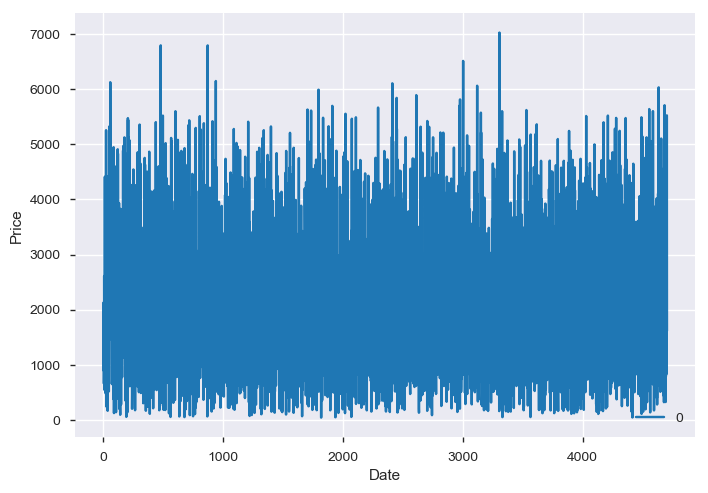

In [106]:
predictions.plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()